In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/xkong100/Data620_Team3/master/final_Project/tweets.csv')

In [3]:
len(data.original_author.unique())


279

In [100]:
data.count()

id                         6444
handle                     6444
text                       6444
is_retweet                 6444
original_author             722
time                       6444
in_reply_to_screen_name     208
in_reply_to_status_id       202
in_reply_to_user_id         208
is_quote_status            6444
lang                       6444
retweet_count              6444
favorite_count             6444
longitude                    12
latitude                     12
place_id                    204
place_full_name             204
place_name                  204
place_type                  204
place_country_code          204
place_country               204
place_contained_within      204
place_attributes            204
place_bounding_box          204
source_url                 6444
truncated                  6444
entities                   6444
extended_entities          1348
dtype: int64

In [52]:
ts = data.groupby('original_author')
original_tweeter = ts.original_author
original_tweeter = original_tweeter.filter(lambda x: len(x) > 3)

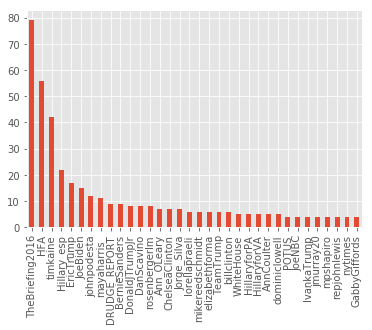

In [5]:
original_tweeter.value_counts().plot(kind='bar')

In [6]:
hillary,trump = data[data.handle == 'HillaryClinton'], data[data.handle == 'realDonaldTrump']

In [78]:
## Tweets about Hillary Clinton.
hillary_tweets = tweets[tweets['handle']!='realDonaldTrump']
hillary_tweets.tail()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
4906,721862481451200512,HillaryClinton,"If we stand up for our values instead of turning to division and hate, there's nothing we can't do.\nhttps://t.co/qGQhd9sOmy",False,NaN,2016-04-18T00:46:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [], 'symbols': [], 'urls': [{'display_url': 'amp.twimg.com/v/100d9dd2-ff2…', 'expanded_url': 'https://amp.twimg.com/v/100d9dd2-ff26-4b8b-aec3-82b2c76c4121', 'indices': [100, 123], 'url': 'https://t.co/qGQhd9sOmy'}], 'hashtags': []}",NaN
4911,721781759311028225,HillaryClinton,Nuestros corazones están con los ecuatorianos y las familias que perdieron a seres queridos en el terremoto de ayer.,False,NaN,2016-04-17T19:25:56,HillaryClinton,7.217700e+17,1.339836e+09,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
4912,721770041709051904,HillaryClinton,Our hearts go out to the people of Ecuador and the families who lost loved ones from yesterday's earthquake. -H,False,NaN,2016-04-17T18:39:22,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
4913,721765314720100352,HillaryClinton,"A great day in East Harlem, in photos. https://t.co/gHbulHPSLu https://t.co/jclVhj7jtD",False,NaN,2016-04-17T18:20:35,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'media': [{'display_url': 'pic.twitter.com/jclVhj7jtD', 'expanded_url': 'http://twitter.com/HillaryClinton/status/721765314720100352/photo/1', 'sizes': {'large': {'h': 682, 'resize': 'fit', 'w': 1024}, 'small': {'h': 227, 'resize': 'fit', 'w': 340}, 'medium': {'h': 400, 'resize': 'fit', 'w': 600}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '721765264870764544', 'indices': [63, 86], 'id': 721765264870764544, 'url': 'https://t.co/jclVhj7jtD', 'media_url_https': 'https://pbs.twimg.com/media/CgQ5ry_WcAAi9Vc.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/CgQ5r...","{'media': [{'display_url': 'pic.twitter.com/jclVhj7jtD', 'expanded_url': 'http://twitter.com/HillaryClinton/status/721765314720100352/photo/1', 'sizes': {'large': {'h': 682, 'resize': 'fit', 'w': 1024}, 'small': {'h': 227, 'resize': 'fit', 'w': 340}, 'medium': {'h': 400, 'resize': 'fit', 'w': 600}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '721765264870764544', 'indices': [63, 86], 'id': 721765264870764544, 'url': 'https://t.co/jclVhj7jtD', 'media_url_https': 'https://pbs.twimg.com/media/CgQ5ry_WcAAi9Vc.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/CgQ5r..."
4916,721733846920740864,HillaryClinton,“Muchos neoyorquinos luchan por pagar la renta ... y las familias latinas y afroamericanas son las más afectadas”. https://t.co/iUuLn5I5Un,False,NaN,2016-04-17T16:15:32,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [{'display_url': 'hrc.io/1VuiNBV', 'expanded_url': 'http://hrc.io/1VuiNBV', 'indices': [115, 138], 'url': 'https://t.co/iUuLn5I5Un'}], 'hashtags': []}",NaN


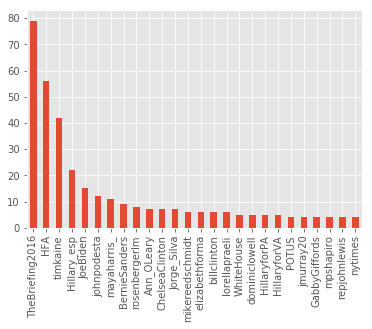

In [79]:
hillary_oa = hillary.groupby('original_author').original_author.filter(lambda x: len(x) > 3).value_counts().plot(kind='bar')

In [71]:


# For Hillary_tweet, in addition to show Hillary_tweet, the most frequent words use in Hillary_tweet,  we are also showing 3 politics: 1. Bill Clinton 2. Joe Biden 3. Bernie Sanders

billclinton= data[data.original_author == 'billclinton']

JoeBiden = data[data.original_author == 'JoeBiden' ]

BernieSanders= data[data.original_author == 'BernieSanders' ]

TheBriefing2016 = data[data.original_author == 'TheBriefing2016' ]

In [80]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

hillary_corpus = hillary_tweets.loc[:,['text']]
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
hillary_corpus['text'] = hillary_corpus['text'].str.lower()
hillary_corpus['text'] = hillary_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

billclinton_corpus = billclinton.loc[:,['text']]
billclinton_corpus['text'] = billclinton_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
billclinton_corpus['text'] = billclinton_corpus['text'].str.lower()
billclinton_corpus['text'] = billclinton_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

JoeBiden_corpus = JoeBiden.loc[:,['text']]
JoeBiden_corpus['text'] = JoeBiden_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
JoeBiden_corpus['text'] = JoeBiden_corpus['text'].str.lower()
JoeBiden_corpus['text'] = JoeBiden_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


BernieSanders_corpus = BernieSanders.loc[:,['text']]
BernieSanders_corpus['text'] = BernieSanders_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
BernieSanders_corpus['text'] = BernieSanders_corpus['text'].str.lower()
BernieSanders_corpus['text'] = BernieSanders_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [81]:
# Hillary_tweet 
hillary_corpus.head()

,text
0,question election put plans action make life better
3,stand together nothing make sure ready vote
4,candidates asked confront racial injustice one real answer
6,election important sit go make sure registered nationalvoterregistrationday h
7,donald trump goes low register vote


In [82]:
freq= pd.Series(' '.join(hillary_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

trump        767
hillary      669
donald       356
president    233
america      191
dtype: int64

In [58]:
billclinton_corpus.head()

,text
1789,incredibly proud hillary happy join tim trail week
2088,proud tell demsinphilly last night still best darn changemaker ever known
3369,aidan made two dads happy father day hillary thrilled marc chelsea
3661,keep saying hillary ultimate changemaker tonight proved proud history made imwithher
3705,said let great turnout tomorrow


In [66]:
freq= pd.Series(' '.join(billclinton_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

hillary        3
proud          3
happy          2
made           2
changemaker    2
dtype: int64

In [63]:
JoeBiden_corpus.head()

,text
36,register vote democrats like iregistered
65,tonight proved ready president donald trump proved debatenight
181,take trump ready responsibility president
618,every woman country deserves free harm fear proud celebrate 22 years violence women act joe
912,folks got elect take back senate let roll sleeves get work joe


In [65]:
freq= pd.Series(' '.join(JoeBiden_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

biden      6
vp         6
america    5
joe        5
back       3
dtype: int64

In [74]:
BernieSanders_corpus.head()

,text
325,says going make public colleges universities tuition free know big deal
378,stand together white black hispanic gay straight women men trump hate
404,friends say vote ask much student debt one candidate make college affordable
2254,got defeat donald trump everything elect hillary clinton white house demsinphilly
2442,one word student debt making college affordable concerned tax breaks rich rncwithbernie


In [75]:
freq= pd.Series(' '.join(BernieSanders_corpus['text']).lower().split()).value_counts()[:100]
freq.head()


democratic    3
house         2
college       2
clinton       2
one           2
dtype: int64

In [77]:
trump_tweets = tweets[tweets['handle']=='realDonaldTrump']
trump_tweets.tail()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Facebook Groups are all voting TRUMP /4000 people! !!"" Great!",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'name': 'Braggadocious', 'id': 26122621, 'screen_name': 'lilredfrmkokomo', 'indices': [1, 17]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [19, 35]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell mass speech. Awesome. Great crowd. Make America Great Again!!!!!!""",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'name': 'marybnall01', 'id': 3477455725, 'screen_name': 'marybnall01', 'indices': [1, 13]}, {'id_str': '25073877', 'name': 'Donald J. Trump', 'id': 25073877, 'screen_name': 'realDonaldTrump', 'indices': [15, 31]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @realDonaldTrump Can't wait for the Iowa caucus in 4 weeks! #Trump2016 https://t.co/JBfyFrZfFb""",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u...","{'media': [{'display_url': 'pic.twitter.com/JBfyFrZfFb', 'sizes': {'thumb': {'h': 150, 'resize': 'crop', 'w': 150}, 'small': {'h': 255, 'resize': 'fit', 'w': 340}, 'large': {'h': 768, 'resize': 'fit', 'w': 1024}, 'medium': {'h': 450, 'resize': 'fit', 'w': 600}}, 'expanded_url': 'http://twitter.com/ghosthunter_lol/status/684198767730540545/photo/1', 'indices': [115, 138], 'id': 684198763573940224, 'url': 'https://t.co/JBfyFrZfFb', 'source_status_id_str': '684198767730540545', 'source_user_id_str': '596178928', 'source_status_id': 684198767730540545, 'id_str': '684198763573940224', 'source_u..."
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack225 @FoxNews @krauthammer Minimizing dependency on China is crucial.Only Trump talks about that",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'name': 'RA-Expression', 'id': 42568997, 'screen_name': 'iLoveiDevices', 'indices': [1, 15]}, {'id_str': '3291836573', 'name': 'Edwin Romero', 'id': 3291836573, 'screen_name': 'EdwinRo47796972', 'indices': [17, 33]}, {'id_str': '22722565', 'name': 'Deplorable Jack', 'id': 22722565, 'screen_name': 'happyjack225', 'indices': [34, 47]}, {'id_str': '1367531', 'name': 'Fox News', 'id': 1367531, 'screen_name': 'FoxNews', 'indices': [48, 56]}, {'id_str': '27744185', 'name': 'Charles Krauthammer', 'id': 27744185, 'screen_name': 'krauthammer', 'indices': [5...",NaN
6443,684216973815844866,realDonaldTrump,"""@SalRiccobono: @realDonaldTrump @troyconway Donald get big business back and# MAKE AMERICA GREAT AGAIN

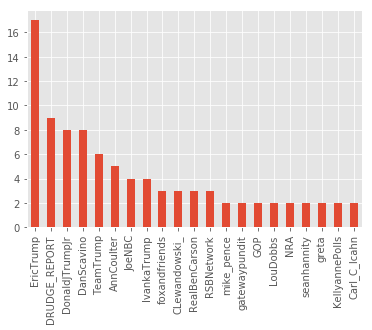

In [8]:
trump_oa = trump.groupby('original_author').original_author.filter(lambda x: len(x) > 1).value_counts().plot(kind='bar')

In [89]:
trump_oa = trump.groupby('original_author').original_author.filter(lambda x: len(x) > 1).value_counts()
trump_oa

EricTrump         17
DRUDGE_REPORT      9
DonaldJTrumpJr     8
DanScavino         8
TeamTrump          6
AnnCoulter         5
JoeNBC             4
IvankaTrump        4
foxandfriends      3
CLewandowski_      3
RealBenCarson      3
RSBNetwork         3
mike_pence         2
gatewaypundit      2
GOP                2
LouDobbs           2
NRA                2
seanhannity        2
greta              2
KellyannePolls     2
Carl_C_Icahn       2
Name: original_author, dtype: int64

In [90]:
# In Trump_Tweet, there are also politics but most of them are from Trump's family, or the politics and business man/woman who support him.

EricTrump = data[data.original_author == 'EricTrump']

DanScavino = data[data.original_author == 'DanScavino' ]

AnnCoulter= data[data.original_author == 'AnnCoulter' ]

In [91]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

trump_corpus = trump_tweets.loc[:,['text']]
trump_corpus['text'] = trump_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
trump_corpus['text'] = trump_corpus['text'].str.lower()
trump_corpus['text'] = trump_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

EricTrump_corpus = EricTrump.loc[:,['text']]
EricTrump_corpus['text'] = EricTrump_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
EricTrump_corpus['text'] = EricTrump_corpus['text'].str.lower()
EricTrump_corpus['text'] = EricTrump_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


DanScavino_corpus = DanScavino.loc[:,['text']]
DanScavino_corpus['text'] = DanScavino_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
DanScavino_corpus['text'] = DanScavino_corpus['text'].str.lower()
DanScavino_corpus['text'] = DanScavino_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


AnnCoulter_corpus = AnnCoulter.loc[:,['text']]
AnnCoulter_corpus['text'] = AnnCoulter_corpus['text'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
AnnCoulter_corpus['text'] = AnnCoulter_corpus['text'].str.lower()
AnnCoulter_corpus['text'] = AnnCoulter_corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [92]:
trump_corpus.head()

,text
5,join 3pm rally tomorrow mid america center council bluffs iowa tickets
8,government people join movement today
12,hillary clinton campaign continues make false claims foundation disclosure
13,cnbc time magazine online polls say donald trump first presidential debate via maga
15,great afternoon little havana hispanic community leaders thank support imwithyou


In [93]:
freq= pd.Series(' '.join(trump_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

thank        519
great        460
hillary      355
trump        353
trump2016    341
dtype: int64

In [94]:
EricTrump_corpus.head()

,text
493,scary statistic americans working harder making less need competent leadership
702,join saturday national day action work makeamericagreatagain
4533,wow speechless thank sidekick keeps amp line via
5021,wisconsin find voting location visit makeamericagreatagain trumptrain
5181,arizona made easy find polling location today primary simply visit


In [95]:
freq= pd.Series(' '.join(EricTrump_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

vote                     7
makeamericagreatagain    6
caucus                   4
friends                  3
trumptrain               3
dtype: int64

In [96]:
DanScavino_corpus.head()

,text
105,jesse jackson donated space rainbow push coalition debatenight
152,join official social media platforms tonight debate manages rapid
749,last nights winner clear amp proven time amp time lets maga lets win trumptrain
877,fit msm narrative wont share jesse jackson 1999
1713,stops overflow room mechanicsburg pennsylvania prior main rally trumpmovement maga


In [97]:
freq= pd.Series(' '.join(DanScavino_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

amp                      2
general                  2
donald                   2
makeamericagreatagain    2
jesse                    2
dtype: int64

In [98]:
AnnCoulter_corpus.head()

,text
939,hear churchill nice turn phrase trump immigration speech magnificent speech ever given
3439,trump speech today churchillian better tell spluttering hysteria tv
3504,anyone plans talk trump ever see speech opinion irrelevant unless listened today
4656,greatest foreign policy speech since washington farewell address
6142,rumsfeld trump touched nerve country way politicians able


In [99]:
freq= pd.Series(' '.join(AnnCoulter_corpus['text']).lower().split()).value_counts()[:100]
freq.head()

speech        5
trump         4
ever          2
today         2
washington    1
dtype: int64

In [10]:
retweets = data[data['is_retweet']==True]
tweets = data[data['is_retweet']==False]

In [11]:
retweets.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
9,780874710049550336,HillaryClinton,3) Has Trump offered a single proposal to redu...,True,mcuban,2016-09-27T21:00:13,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'nam...",NaN
10,780869063648153601,HillaryClinton,The election is just weeks away. Check if you'...,True,ddlovato,2016-09-27T20:37:47,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '21111883', 'nam...",NaN
11,780867418012979204,realDonaldTrump,"On National #VoterRegistrationDay, make sure y...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'nam...",NaN


In [12]:
pd.options.display.max_colwidth = 600
retweets.iloc[[2]].text

9    3) Has Trump offered a single proposal to reduce the friction of starting a business. @HillaryClinton has https://t.co/OhFAFEFsUq
Name: text, dtype: object

In [13]:
retweets.iloc[[8]].text

37    I've been fortunate to meet young Americans from all over the country. We all make choices. This is mine...… https://t.co/bYoUE91TOO
Name: text, dtype: object

In [15]:
len(tweets)

5722

In [101]:
trump_tweets[trump_tweets['text'].str.contains('00') ]

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
59,780719876335894528,realDonaldTrump,Great debate poll numbers - I will be on @foxandfriends at 7:00 to discuss. Enjoy!,False,NaN,2016-09-27T10:44:58,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '15513604', 'name': 'FOX & Friends', 'id': 15513604, 'screen_name': 'foxandfriends', 'indices': [41, 55]}], 'symbols': [], 'urls': [], 'hashtags': []}",NaN
62,780644145492877312,realDonaldTrump,"Thank you! CNBC #DebateNight poll with over 400,000 votes. \nTrump 61%\nClinton 39%\n#AmericaFirst #ImWithYou… https://t.co/MJ3NwA98op",False,NaN,2016-09-27T05:44:02,NaN,NaN,NaN,False,...,city,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], _api=<tweepy.api.API object at 0x7f013ae30588>)",http://twitter.com/download/iphone,True,"{'user_mentions': [], 'symbols': [], 'urls': [{'display_url': 'twitter.com/i/web/status/7…', 'expanded_url': 'https://twitter.com/i/web/status/780644145492877312', 'indices': [108, 131], 'url': 'https://t.co/MJ3NwA98op'}], 'hashtags': [{'text': 'DebateNight', 'indices': [16, 28]}, {'text': 'AmericaFirst', 'indices': [82, 95]}, {'text': 'ImWithYou', 'indices': [96, 106]}]}",NaN
63,780642262921441280,realDonaldTrump,"TIME #DebateNight poll - over 800,000 votes. Thank you! \n#AmericaFirst #MAGA https://t.co/bTPX9E0wKu",False,NaN,2016-09-27T05:36:33,NaN,NaN,NaN,False,...,city,US,United States,[],{},"BoundingBox(type='Polygon', coordinates=[[[-74.026675, 40.683935], [-73.910408, 40.683935], [-73.910408, 40.877483], [-74.026675, 40.877483]]], _api=<tweepy.api.API object at 0x7f013ae30588>)",http://twitter.com/download/iphone,False,"{'media': [{'display_url': 'pic.twitter.com/bTPX9E0wKu', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/780642262921441280/photo/1', 'sizes': {'large': {'h': 1701, 'resize': 'fit', 'w': 1361}, 'small': {'h': 680, 'resize': 'fit', 'w': 544}, 'medium': {'h': 1200, 'resize': 'fit', 'w': 960}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '780642256374075392', 'indices': [77, 100], 'id': 780642256374075392, 'url': 'https://t.co/bTPX9E0wKu', 'media_url_https': 'https://pbs.twimg.com/media/CtVl_wPWEAArxzp.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/...","{'media': [{'display_url': 'pic.twitter.com/bTPX9E0wKu', 'expanded_url': 'https://twitter.com/realDonaldTrump/status/780642262921441280/photo/1', 'sizes': {'large': {'h': 1701, 'resize': 'fit', 'w': 1361}, 'small': {'h': 680, 'resize': 'fit', 'w': 544}, 'medium': {'h': 1200, 'resize': 'fit', 'w': 960}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'id_str': '780642256374075392', 'indices': [77, 100], 'id': 780642256374075392, 'url': 'https://t.co/bTPX9E0wKu', 'media_url_https': 'https://pbs.twimg.com/media/CtVl_wPWEAArxzp.jpg', 'type': 'photo', 'media_url': 'http://pbs.twimg.com/media/..."
83,780598541441912832,realDonaldTrump,.@HillaryClinton’s Nuclear Agreement Paved The Way For The $400 Million Ransom Payment #DebateNight\nhttps://t.co/qfZTx6aKYs,False,NaN,2016-09-27T02:42:49,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '1339835893', 'name': 'Hillary Clinton', 'id': 1339835893, 'screen_name': 'HillaryClinton', 'indices': [1, 16]}], 'symbols': [], 'urls': [{'display_url': 'donaldjtrump.com/press-releases…', 'expanded_url': 'https://www.donaldjtrump.com/press-releases/clintons-nuclear-agreement-paved-the-way-for-the-400-million-ransom-payment', 'indices': [100, 123], 'url': 'https://t.co/qfZTx6aKYs'}], 'hashtags': [{'text': 'DebateNight', 'indices': [87, 99]}]}

In [102]:

trump_corpus['text']

5                                         join 3pm rally tomorrow mid america center council bluffs iowa tickets
8                                                                          government people join movement today
12                                    hillary clinton campaign continues make false claims foundation disclosure
13                           cnbc time magazine online polls say donald trump first presidential debate via maga
15                              great afternoon little havana hispanic community leaders thank support imwithyou
16                      last 24 hrs raised 13m online donations national call day still going thank america maga
27                                                 well saying nbc presidential forum last night big debate nice
33                                                                                        thank endorsement maga
42                                      great honor final debate polls movement wins americafirs

In [103]:

trump_corpus['text'] = trump_corpus['text'].apply(lambda x: re.sub(r'\d+', '', x))

from sklearn.feature_extraction.text import CountVectorizer

word_vectors = CountVectorizer(ngram_range=(1,3), analyzer='word')

sparse_matrix = word_vectors.fit_transform(trump_corpus['text'])

frequencies = sum(sparse_matrix).toarray()[0]

trump_bigrams = pd.DataFrame(frequencies, index=word_vectors.get_feature_names(), columns=['frequency'])